# Le prix des actions

En théorie, nous pouvons appliquer des techniques de régression pour prédire les prix d'une action particulière. Cependant, en pratique, il est difficile de s'assurer que l'action que nous choisissons est appropriée à des fins de prédictio à cause d'une multitudes de d'autres facteurs qui sortent du cadre du cours pour le moment. Par conséquent, nous allons nous nous concentrerons donc sur l'un des indices boursiers les plus populaires pour mieux illustrer et généraliser notre approche de régression des prix.

Regardons d'abord ce qu'est un indice. 

>Un indice boursier représente le taux de croissance, entre deux dates, de la juste valeur d'un portefeuille théorique d'actions cotées sur les marchés organisés appartenant à une liste d'entreprises sélectionnée par des choix raisonnés. (source: [Wikipédia](https://fr.wikipedia.org/wiki/Indice_boursier#:~:text=Un%20indice%20boursier%20d%C3%A9signe%2C%20quasiment,s%C3%A9lectionn%C3%A9e%20par%20des%20choix%20raisonn%C3%A9s.))



Autrement dit, un indice boursier est une mesure statistique de la valeur d'une partie du marché boursier global. Un indice comprend plusieurs actions suffisamment diverses pour représenter une section de l'ensemble du marché. Et le prix d'un indice est généralement calculé comme la moyenne pondérée des prix des actions sélectionnées.



Le Dow Jones Industrial Average (DJIA) est l'un des indices les plus anciens et les plus suivis au monde. Il se compose de 30 des actions les plus importantes des États-Unis, telles que Microsoft, Apple, General Electric et Walt Disney Company, et représente environ un quart de la valeur de l'ensemble du marché américain. Vous pouvez consulter ses cours et ses performances quotidiennes sur [Yahoo Finance](https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI&guccounter=1). 

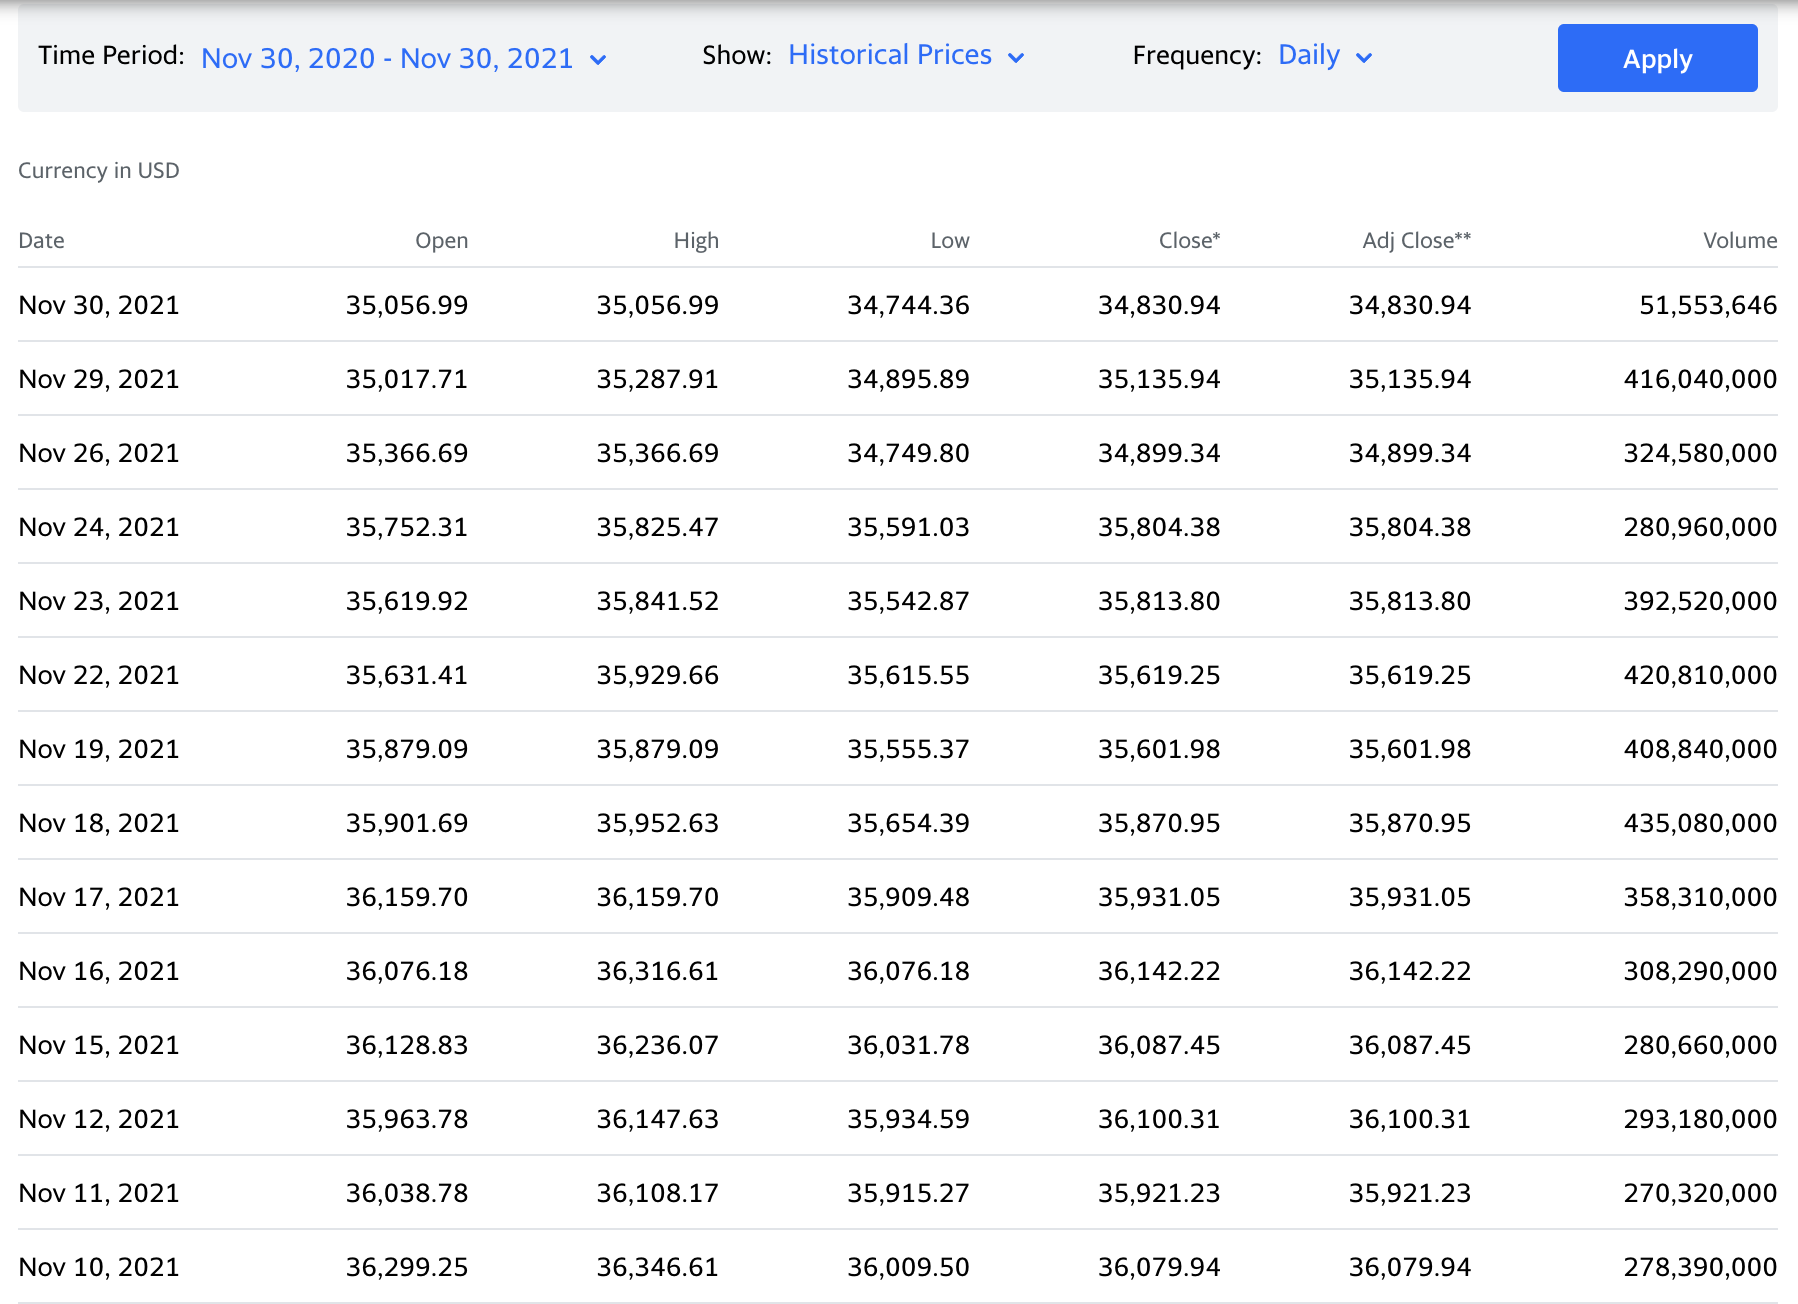

Chaque jour de bourse, le prix d'une action change et est enregistré en temps réel. Cinq valeurs illustrant les mouvements du prix sur une unité de temps (généralement un jour, mais cela peut aussi être une semaine ou un mois) sont des indicateurs clés de la négociation. Il s'agit des valeurs suivantes :

- Open : Le prix de départ pour une journée de négociation donnée.
- Close : Le prix final de cette journée.
- High : Les prix les plus élevés auxquels l'action a été négociée ce jour-là.
- Low : Le prix le plus bas auquel l'action a été négociée ce jour-là.
- Volume : Le nombre total d'actions négociées avant la fermeture du marché ce jour-là.

# Extraction des données

Créer une fonction `R` qui vous permet d'extraire des données quotidiennes sur un indice boursier quelconque automatiquement à partir de [Yahoo Finance](https://ca.finance.yahoo.com/). Cette fonction appelée `dataFinaExtract(date_debut, date_fin, NomIndcie)` doit prendre trois arguments:

* date_debut: la date de début de la période
* date_fin: la date de fin de la période
* NomIndcie: Le nom de l'indice

Cette fonction vous retourne ensuite les données désirées sous forme de _data frame_ que vous pouvez utiliser dans les prochaines étapes

# Feature engineering

Le _feature engineering_ est le processus de création de caractéristiques spécifiques à un domaine à partir de caractéristiques existantes afin d'améliorer les performances d'un modèle de prédiction.

Lorsqu'ils prennent une décision d'investissement, les investisseurs examinent généralement les prix historiques sur une période donnée, et pas seulement le prix de la veille. Par conséquent, dans notre cas de prédiction du prix des actions, nous pouvons calculer le prix de clôture moyen de la semaine écoulée (cinq jours de bourse), du mois écoulé et de l'année écoulée en tant que trois nouvelles fonctionnalités. Nous pouvons également personnaliser la fenêtre temporelle à la taille que nous voulons, comme le dernier trimestre ou les six derniers mois. En plus de ces trois caractéristiques de prix moyen, nous pouvons générer de nouvelles caractéristiques associées à la tendance des prix en calculant les ratios entre chaque paire de prix moyens dans les trois différentes périodes de temps, par exemple, le rapport entre le prix moyen de la semaine passée et celui de l'année passée.

Outre les prix, le volume est un autre facteur important que les investisseurs analysent. De même, nous pouvons générer de nouvelles caractéristiques basées sur le volume en calculant les volumes moyens dans plusieurs cadres temporels différents et les ratios entre chaque paire de valeurs moyennes.
Outre les valeurs moyennes historiques dans une fenêtre temporelle, les investisseurs prennent également en compte la volatilité des actions. La volatilité décrit le degré de variation des prix d'une action ou d'un indice donné dans le temps. En termes statistiques, il s'agit essentiellement de l'écart type des cours de clôture. Nous pouvons facilement générer de nouveaux ensembles de caractéristiques en calculant l'écart type des cours de clôture dans une période donnée, ainsi que l'écart type des volumes échangés. De la même manière, les ratios entre chaque paire de valeurs d'écart type peuvent être inclus dans notre pool de caractéristiques techniques.
 

Enfin, le rendement est une mesure financière importante que les investisseurs surveillent de près. Le rendement est le pourcentage de gain ou de perte du cours de clôture d'une action ou d'un indice sur une période donnée. Par exemple, le rendement quotidien et le rendement annuel sont des termes financiers que nous entendons fréquemment. Ils sont calculés comme suit :

\begin{aligned}
\text { rendement }_{i : i-1} &=\frac{\text { prix }_{i}-\text { prix }_{i-1}}{\text { prix }_{i-1}} \\
\text { rendement }_{i : i-365} &=\frac{\text { prix }_{i}-\text { prix }_{i-365}}{\text { prix }_{i-365}}
\end{aligned}

Ici, le prix est le $\text{prix}_i$ du $i^{\text {th }}$ jour et le $\text{prix}_{i-1}$ est le prix du jour précédent. Les rendements hebdomadaires et mensuels peuvent être calculés de la même manière. Sur la base des rendements quotidiens, nous pouvons produire une moyenne mobile sur un nombre particulier de jours.

Par exemple, étant donné les rendements quotidiens de la semaine passée, le rendement $_{i : i-1}$, le rendement $_{i-1 : i-2}$, le rendement $_{i-2 : i-3}$, le rendement $_{i-3 : i-4}$ et le rendement $_{i-4 : i-5}$, nous pouvons calculer la moyenne mobile sur cette semaine comme suit :

\begin{equation}
\text { MovingAvg }_{i_{-} 5}=\frac{\text { rendement }_{i: i-1}+\text { rendement }_{i-1: i-2}+\text { rendement }_{i-2: i-3}+\text { rendement }_{i-3: i-4}+\text { rendement }_{i-4: i-5}}{5}
\end{equation}

Créer une fonction appelée `feature_engin` (qui peut regrouper un ensemble de fonctions) qui vous permet de générer ces nouvelles variables décrites dans les paragraphes précédents. Ces nouvelles caractéristiques doivent être calculées sur les 5, 30 et 365 derniers jours. Votre fonction prend en argument un data frame de données précédent et vous retourne les nouvelles caractéristiques en plus des variables suivantes:

* $\text { OpenPrice }_{i}$
* $\text { OpenPrice }_{i-1}$
* $\text { ClosePrice }_{i-1}$
* $\text { HighPrice }_{i-1}$
* $\text { LowPrice }_{i-1}$
* $\text { Volume }_{i-1}$

Au total, vous devez avoir un minimum de 20 nouvelles caractéristiques.

# Modélisation (Bonus 2 points)

Pour cette partie, modélisation et évaluation de la performance, vous pourriez avoir un bonus de 2 points. Même si la partie modélisation n'as pas été couverte dans le cours, il existe beaucoup de ressources en ligne en ce qui concerne la modélisation. 

Une fois que vos données sont prêtes, utilisez un échantillon (aléatoire avec un `set.seed(3035)`) de 70% de vos données pour ajuster un modèle de régression linéaire qui prédit la variable $\text{ClosePrice}$

## Évaluation de la performance des modèles

Afin d'évaluer la performance de votre modèle, vous pouvez utiliser le $R^2$ (prononcé r au carré) qui indique la qualité de l'ajustement d'un modèle de régression. Il s'agit de la fraction de la variation de la variable dépendante qu'un modèle de régression est capable d'expliquer. Il est compris entre 0 et 1, ce qui représente un ajustement nul ou une prédiction parfaite. Il existe une variante du R2 appelée R2 ajusté. Il tient compte du nombre de caractéristiques dans un modèle par rapport au nombre de points de données. Vous pouvez vous baser sur cette métrique pour améliorer votre modèle.

# Ce que vous devez me remettre:

Dans les deux documents suivants que vous devez remettre, vous devez clairement indiquer les noms de membre de votre équipe.

1. Un rapport

D'environ d'un maximum d'une page qui décrit quelles approches vous avez pris afin d'améliorer la performance de vos deux modèles.

2. Code R

Votre code R doit propre et reproductible sans aucune erreur.